#Modelo Random Forest, Características de las canciones con más vistas en Youtube

Con los mismos datos de las canciones más reproducidas en Spotify en 2024, al tener datos de Youtube, he realizado un modelo que ayuda a ver que características tienen las canciones con más reproduciones en youtube y como se relacionan con el resto de columnas numericas.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly_express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv('/Users/aguedagambon/Bootcamp/Temario/Modulo_3/Proyecto_Spotify/spotify-2024-clean.csv')

In [4]:
# Lista de columnas a eliminar
columns_to_drop = ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Explicit Track']

# Me quedo con las numericas
df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
df.head()

,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,YouTube Views Cluster
0,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
1,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,0
2,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,3224599.0,11822942.0,0
4,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,2.653441e+07,2.659172e+08,1.127639e+08,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,0


# Clustering + RandomForest

Precisión del modelo: 0.89

Importancia de las características:
                       feature  importance
0              Spotify Streams    0.117979
16               Shazam Counts    0.103746
1       Spotify Playlist Count    0.073946
2       Spotify Playlist Reach    0.071207
14      Pandora Track Stations    0.066975
10       Deezer Playlist Count    0.064357
8                AirPlay Spins    0.063135
13             Pandora Streams    0.059552
4                 TikTok Posts    0.054979
7   Apple Music Playlist Count    0.049083
5                 TikTok Likes    0.048258
6                 TikTok Views    0.047365
11       Deezer Playlist Reach    0.045892
3           Spotify Popularity    0.043027
9               SiriusXM Spins    0.037305
12       Amazon Playlist Count    0.035951
15          Soundcloud Streams    0.017243

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       817
           1       0.48   

/Users/aguedagambon/Desktop/Spotify_analisis/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aguedagambon/Desktop/Spotify_analisis/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aguedagambon/Desktop/Spotify_analisis/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

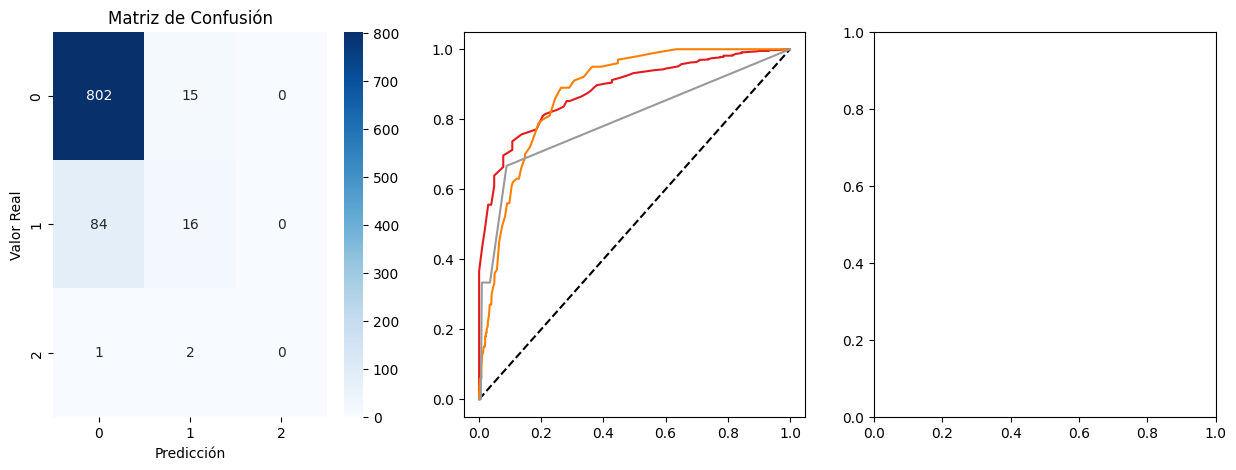

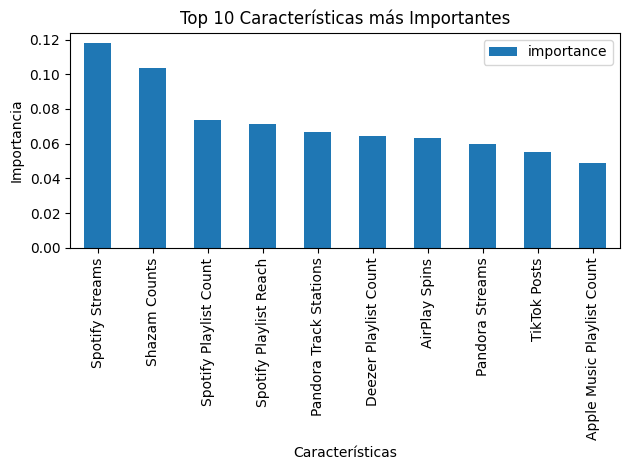

In [11]:
#Clustering de 'YouTube Views'
kmeans = KMeans(n_clusters=3, random_state=42)
df['YouTube Views Cluster'] = kmeans.fit_predict(df[['YouTube Views']])


X = df.drop(['YouTube Views', 'YouTube Views Cluster','YouTube Likes','YouTube Playlist Reach'], axis=1)
y = df['YouTube Views Cluster']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Importancia de las características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importance)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(15, 5))

# Matriz de confusión
plt.subplot(131)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

# Curva ROC (para multiclase)
plt.subplot(132)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = rf_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot([0, 1], [0, 1], 'k--')
colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC clase {i} (AUC = {roc_auc[i]:.2f})')


# Importancia de características
plt.subplot(133)
feature_importance.head(10).plot(x='feature', y='importance', kind='bar')
plt.title('Top 10 Características más Importantes')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()